<a href="https://colab.research.google.com/github/HarmeetKaur04/Bharat_intern_ml/blob/main/imageGeneration_and_BackgroundReplacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Generation and Background Replacement using Stable Diffusion

## Introduction

This project demonstrates how to leverage various image generation models to create and modify images using Stable Diffusion. The notebook covers:
- **Image Generation with Text-to-Image and Image-to-Image models.**
- **Using Stable Diffusion 3.5 and 3 models for image manipulation.**
- **Implementing object replacement and background modification through automatic masking.**
- **Exploring the capabilities of model quantization for efficiency.**

The notebook will guide you through model selection, image generation, and techniques to replace the background of images using AI models.

## Goals
- Explore the functionalities of different Stable Diffusion versions (3 and 3.5).
- Implement a background replacement feature using image-to-image generation.
- Apply adapter fusion (e.g., face/style adapters) for enhanced image generation.
- Demonstrate automatic mask generation for object replacement.


## Model Selection

#### Stable Diffusion Models Overview

- **Text-to-Image:** Generates images from textual descriptions.
- **Image-to-Image:** Modifies an image based on an input image with guidance from a text prompt.
- **Inpainting:** Allows for specific parts of an image to be modified (e.g., replace background).

### Key Differences:
- Flux and Efficiency: Stable Diffusion 3.5 has Flux, which allows for smoother integration of text and images and faster results.
- Image Quality: Stable Diffusion 3.5 generally offers higher quality and better fine-tuning options.
- Speed and Resource Usage: Stable Diffusion 3.5 is typically more efficient, allowing for faster image generation with fewer resources.

  In short, Stable Diffusion 3.5 is a more advanced and optimized version of Stable Diffusion 3, with improvements in speed, quality, and feature set.

## Adapter Fusion
Adapters such as face or style adapters can enhance the capabilities of Stable Diffusion models. These adapters allow for specific adjustments to images, like improving facial details or adjusting the artistic style of the output.

## Quantization
Quantization is used to optimize models for faster and more efficient inference, especially on hardware with limited resources. For Stable Diffusion models, this process can be done using diffusers for quantized weights.

## Object Replacement Feature
  1. Load the quantized model.
  2. Automatically generate a mask.
  3. Replace the object with a new one.
  4. Display the results.

## Load the quantized model.

In [1]:
!pip install torch torchvision supervision diffusers transformers bitsandbytes pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 8.4 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import StableDiffusionInpaintPipeline, StableDiffusionPipeline
from PIL import Image
from transformers import BitsAndBytesConfig

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [4]:
nf4_config = BitsAndBytesConfig(load_in_4bit=True, bnb_4bit_quant_type="nf4")

In [5]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    quantization_config=nf4_config, # quantization config
    #torch_dtype=torch.float16,  # Use float16 for better performance
).to(DEVICE)  # Move model to GPU if available

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Keyword arguments {'quantization_config': BitsAndBytesConfig {
  "_load_in_4bit": true,
  "_load_in_8bit": false,
  "bnb_4bit_compute_dtype": "float32",
  "bnb_4bit_quant_storage": "uint8",
  "bnb_4bit_quant_type": "nf4",
  "bnb_4bit_use_double_quant": false,
  "llm_int8_enable_fp32_cpu_offload": false,
  "llm_int8_has_fp16_weight": false,
  "llm_int8_skip_modules": null,
  "llm_int8_threshold": 6.0,
  "load_in_4bit": true,
  "load_in_8bit": false,
  "quant_method": "bitsandbytes"
}
} are not expected by StableDiffusionInpaintPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

## Automatically generate a mask

In [6]:
# Cloning the GitHub repository for Segment Anything model from Facebook Research
!git clone "https://github.com/facebookresearch/segment-anything"

Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (159/159), done.


In [7]:
# Downloading a pre-trained model file (weights) from the provided URL
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

In [8]:
# Importing the necessary library for image handling
from PIL import Image
from io import BytesIO
import requests
import os
import numpy as np

# Defining the URL of an image to process
image_path = "https://img.freepik.com/free-photo/adorable-cat-lifestyle_23-2151593320.jpg"

# Fetching the image from the URL and reading it into memory as bytes
image_bytes = BytesIO(requests.get(image_path).content)

# Opening the image using PIL from the downloaded bytes
image = Image.open(image_bytes)

# Converting the image into a NumPy array, then back to an image object
image = Image.fromarray(np.array(image))

# Resizing the image to a fixed 512x512 resolution
image = image.resize((512, 512))

In [9]:
model_type = "vit_b"
model_path = '/content/sam_vit_b_01ec64.pth'
print(model_path, "exist:", os.path.isfile(model_path))

/content/sam_vit_b_01ec64.pth exist: True


In [10]:
import sys
sys.path.append('/content/segment-anything')

In [11]:
# Importing necessary components from the Segment Anything module
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

# Initializing the model using a checkpoint (weights) and moving it to the desired device (GPU/CPU)
sam = sam_model_registry[model_type](checkpoint=model_path).to(device=DEVICE)

# Creating a mask generator object from the initialized model
mask_generator = SamAutomaticMaskGenerator(sam)

# Generating the segmentation results from the image (as a NumPy array)
result = mask_generator.generate(np.array(image))

# Sorting the result by area and extracting segmentation data, bounding box information, point coordinates
segmentations = [segment['segmentation'] for segment in sorted(result, key=lambda x: x['area'], reverse=True)]
bboxs = [bbox['bbox'] for bbox in sorted(result, key=lambda x: x['area'], reverse=True)]
points = [point['point_coords'] for point in sorted(result, key=lambda x: x['area'], reverse=True)]

print(bboxs)
print(points)
# Checking the number of segmentations (masks) generated
len(segmentations)

/content/segment-anything/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


[[82.0, 76.0, 405.0, 435.0], [401.0, 397.0, 110.0, 114.0], [450.0, 304.0, 61.0, 91.0], [282.0, 180.0, 39.0, 23.0], [176.0, 193.0, 41.0, 22.0], [237.0, 221.0, 41.0, 22.0], [271.0, 502.0, 43.0, 9.0]]
[[[232.0, 344.0]], [[488.0, 472.0]], [[488.0, 360.0]], [[312.0, 184.0]], [[200.0, 200.0]], [[264.0, 232.0]], [[280.0, 504.0]]]


7

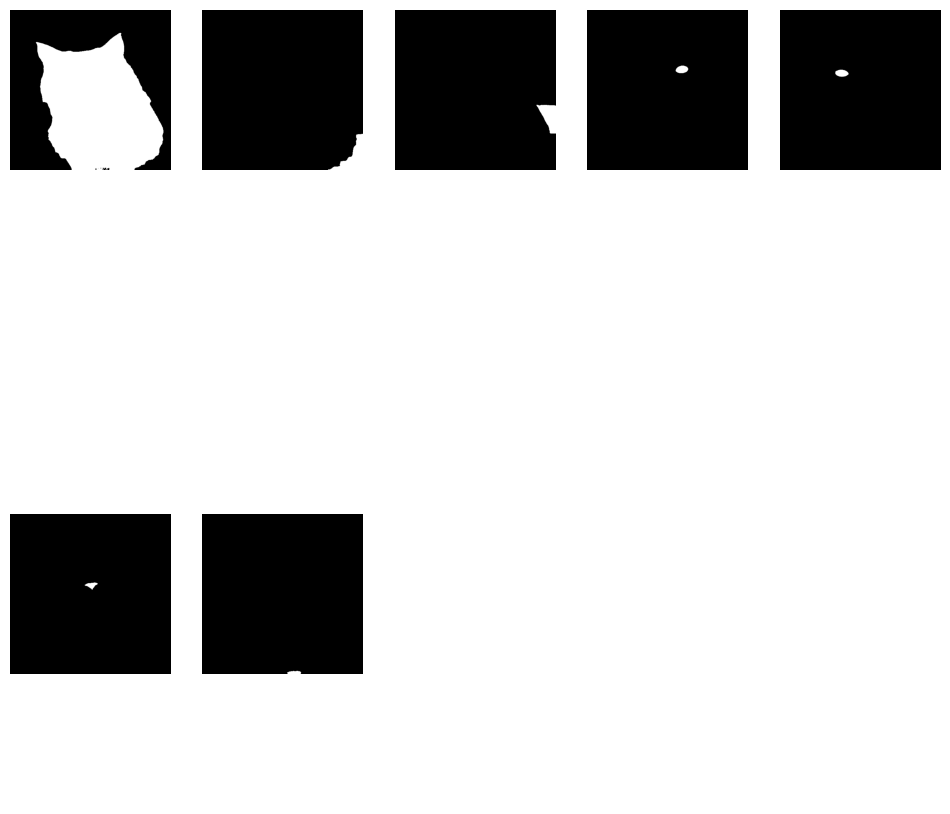

In [12]:
# Importing a library for visualization
import supervision as  sv

# Displaying the first 10 segmentations as images in a grid of size (2 rows, 5 columns)
sv.plot_images_grid(
    images=segmentations[0:10],
    grid_size=(2,5)
)

In [13]:
import numpy as np
# Inverting the segmentation mask at index 1 in the segmentations list
# The segmentation masks are binary, where `True` represents the object and `False` represents the background.
# np.logical_not() inverts the boolean values, so `True` becomes `False` and `False` becomes `True`.
mask = np.logical_not(segmentations[0])
mask = Image.fromarray(mask).convert('L')

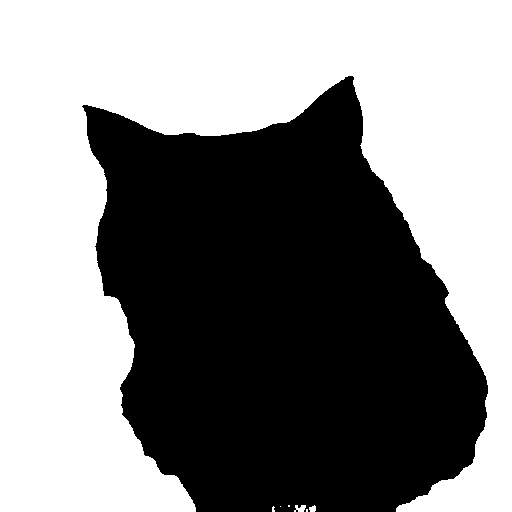

In [14]:
mask

## Replace the object with a new one

In [15]:
def inpaint_with_mask(image, mask, prompt):
  image = Image.fromarray(np.array(image))
  mask = Image.fromarray(np.array(mask))

  image = image.resize((512, 512))
  mask = mask.resize((512, 512))

  inpainted_image = pipe(prompt=prompt, image=image, mask_image=mask).images[0]

  return inpainted_image

In [16]:
prompt = "background beach"
background_change_image = inpaint_with_mask(image, mask, prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

## Display the results.

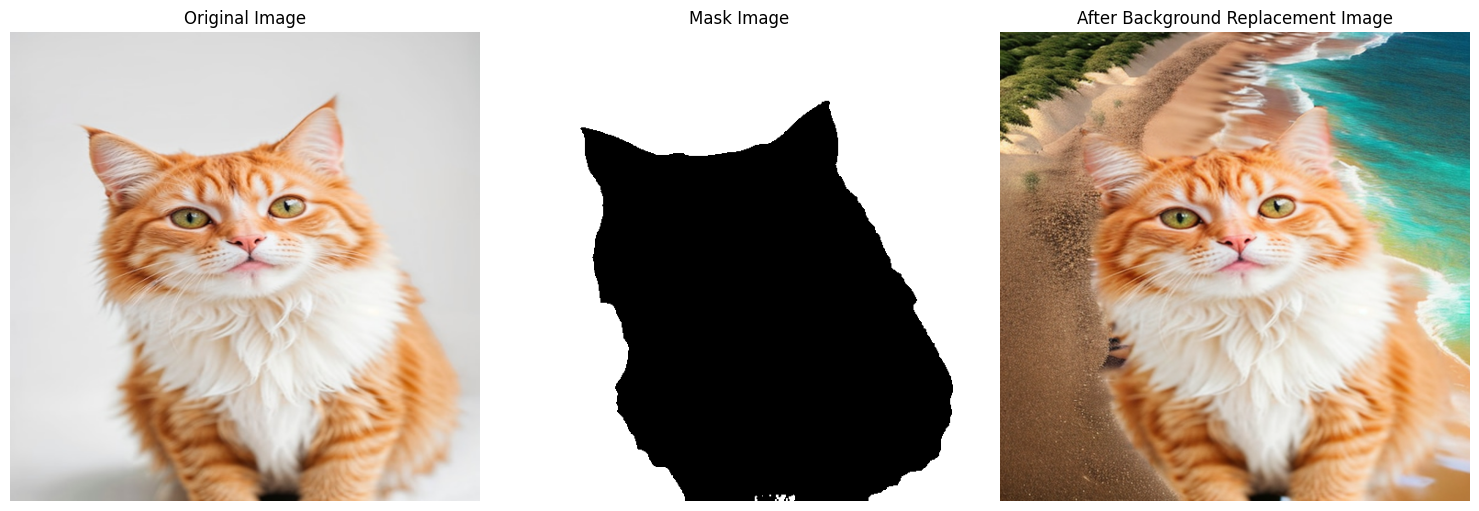

In [17]:
# Plot the original image, mask image, and background replacement image
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the images
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask Image')
axes[1].axis('off')

axes[2].imshow(background_change_image)
axes[2].set_title('After Background Replacement Image')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()